In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import networkx as nx
import re
import matplotlib
matplotlib.use('Agg')

In [ ]:
LLM_OUTPUTS = "..."

ENTITY= pd.read_csv(LLM_OUTPUTS)
ENTITY.head()

In [ ]:
# PRe-Processing

ENTITY["Outputs_JD"] = ENTITY["Outputs_JD"].str.replace("\n","")
ENTITY["Outputs_CV"] = ENTITY["Outputs_CV"].str.replace("\n","")

ENTITY["Outputs_JD"] = ENTITY["Outputs_JD"].str.replace("json","")
ENTITY["Outputs_CV"] = ENTITY["Outputs_CV"].str.replace("json","")

ENTITY["Outputs_JD"] = ENTITY["Outputs_JD"].str.replace("```","")
ENTITY["Outputs_CV"] = ENTITY["Outputs_CV"].str.replace("```","")

ENTITY["Outputs_JD"] = ENTITY["Outputs_JD"].str.replace(" in "," ")
ENTITY["Outputs_CV"] = ENTITY["Outputs_CV"].str.replace(" in "," ")

ENTITY["Outputs_JD"] = ENTITY["Outputs_JD"].str.replace(" of "," ")
ENTITY["Outputs_CV"] = ENTITY["Outputs_CV"].str.replace(" of "," ")

ENTITY["Outputs_JD"] = ENTITY["Outputs_JD"].str.replace("degree","")
ENTITY["Outputs_CV"] = ENTITY["Outputs_CV"].str.replace("degree", "")
ENTITY.head()

In [41]:
def visualize_job_description(text, G_id, max_node_length=4):
    
    text2=text.lower()
    
    # text pre-processing 
    text2 = re.sub(r"(\w+)'s", r"\1s", text2)
    text2 = text2.replace('null', 'None')
    text2 = text2.replace('none', 'None')
    
    
    # Convert the text to a dictionary
    job_description = eval(text2)
    
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges to the graph
    G.add_node(G_id,label=G_id)
    for category, items in job_description.items():
        # G.add_node(category, label=category)
        # G.add_edge('JD_1', category, label=category)  # Edge label for the first child

        for idx, item in enumerate(items):
            if isinstance(item, dict):
                try: 
                    cn = item.get('Company Name', "Company")
                    jt = item.get('Job Title', "Job Title not specified")
                    
                    
                    if (jt=="Job Title not specified") or (cn=="Job Title not specified"):
                        continue
                    
                    elif (cn == None) and (jt != None):
                        G.add_edge(G_id, jt)
                        G.edges[G_id, jt]['label'] = category
                    elif (cn == None) and (jt == None):
                        continue
                    else:
                        G.add_edge(G_id, jt)
                        G.edges[G_id, jt]['label'] = category
                        
                        G.add_edge(G_id, cn)
                        G.edges[G_id, cn]['label'] = category
                        
                        G.add_edge(jt, cn)
                        G.edges[jt, cn]['label'] = 'Job Skill'
                    
                except:
                    d_keys = list(item.values())
                    for d_key in d_keys:
                        if len(d_key.split()) <= max_node_length:  # Exclude nodes with sentence length more than max_node_length
                            G.add_node(d_key, label=d_key)
                            G.add_edge(G_id, d_key)
                            G.edges[G_id, d_key]['label'] = category
                            
                            for d_key_2 in d_keys:
                                if len(d_key.split()) <= max_node_length:  # Exclude nodes with sentence length more than max_node_length
                                    if d_key != d_key_2:
                                        G.add_node(d_key_2, label=d_key_2)
                                        G.add_edge(d_key,d_key_2)
                                        G.edges[d_key,d_key_2]['label'] = "Same Job"
                            
                                        
            elif isinstance(item, list):    
                continue
                    
            elif len(item.split()) <= max_node_length:  # Exclude nodes with sentence length more than max_node_length
                G.add_node(item, label=item)
                G.add_edge(G_id, item)
                G.edges[G_id, item]['label'] = category
                
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    # Visualize the graph
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'label')
    node_labels = nx.get_node_attributes(G, 'label')

    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, font_size=8, node_size=700, node_color='skyblue', font_color='black', font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_color='black', font_weight='bold')

    # Save the figure locally
    plt.savefig("individuals/"+G_id+".png")
    plt.show()
    
    return G


C:\Users\Azmine Toushik Wasi\AppData\Local\Temp\ipykernel_2668\1440705120.py:87: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


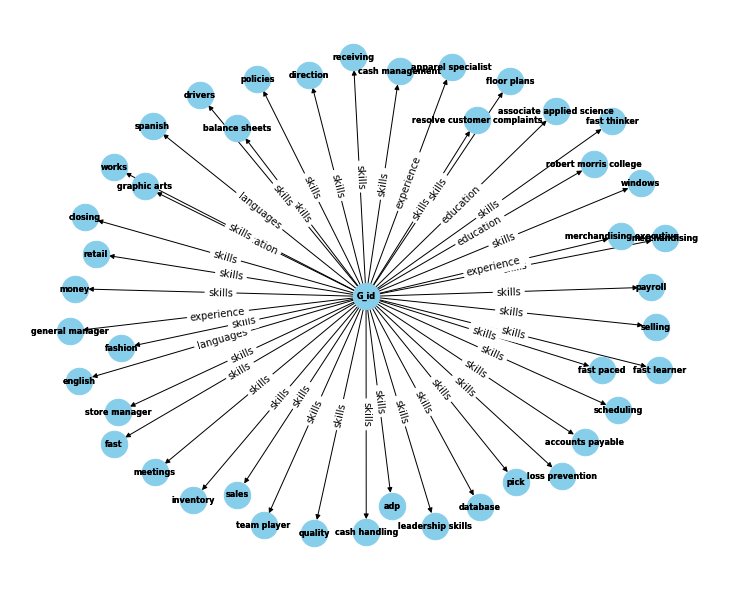

In [50]:
# Example usage:
jd_text = ENTITY["Outputs_CV"][196]
G = visualize_job_description(jd_text,"G_id") 

C:\Users\Azmine Toushik Wasi\AppData\Local\Temp\ipykernel_2668\1440705120.py:87: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


196 JD: Done
196 CV: Done
197 JD: Done
197 CV: Done
198 JD: Done
198 CV: Done
199 JD: Done
199 CV: Done


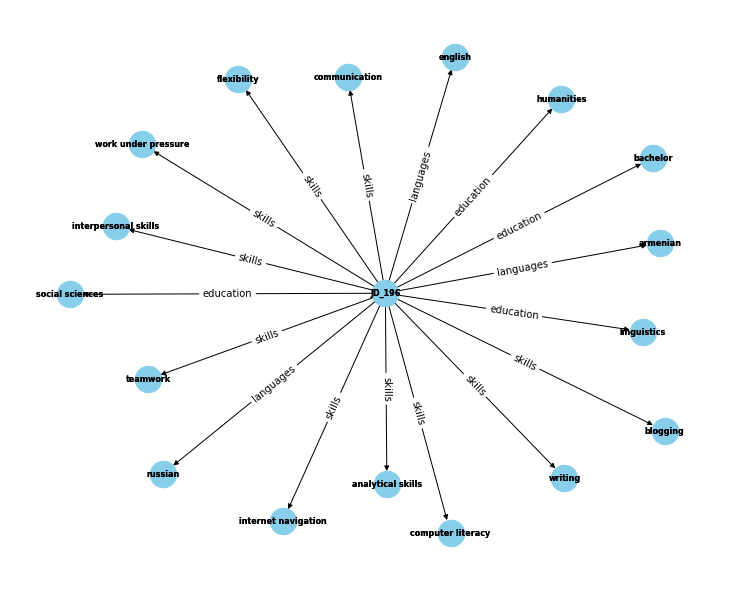

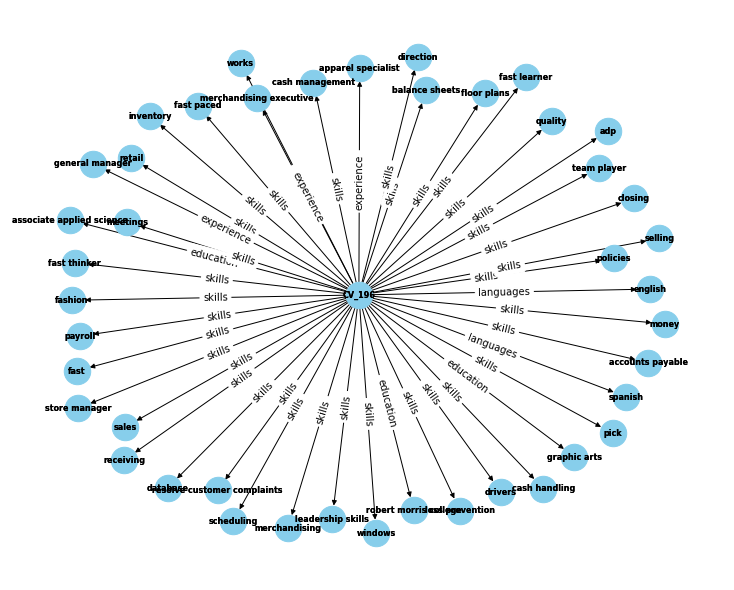

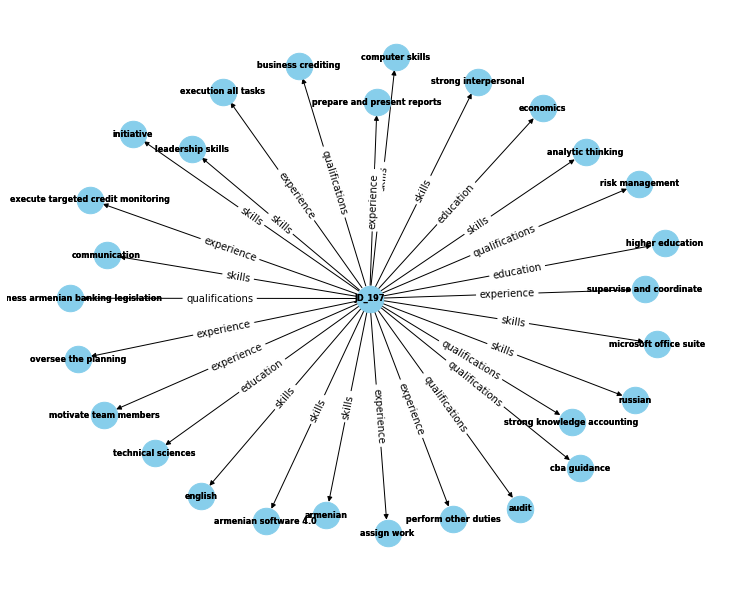

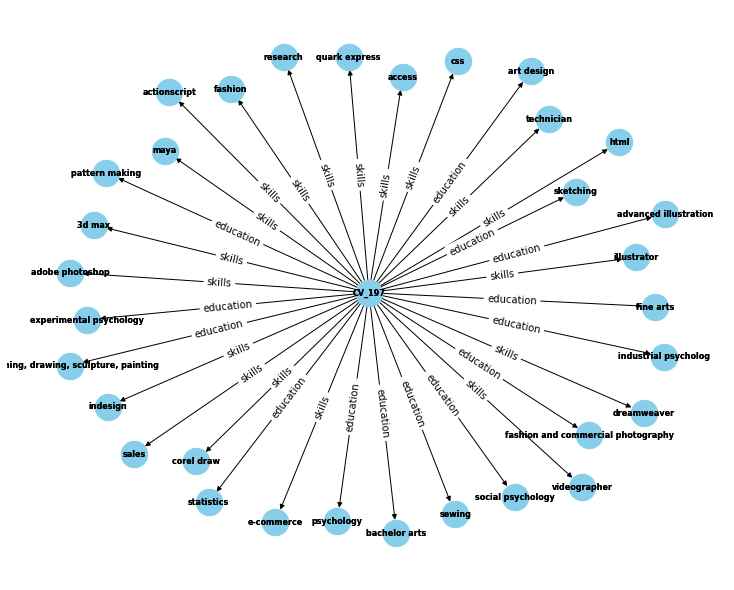

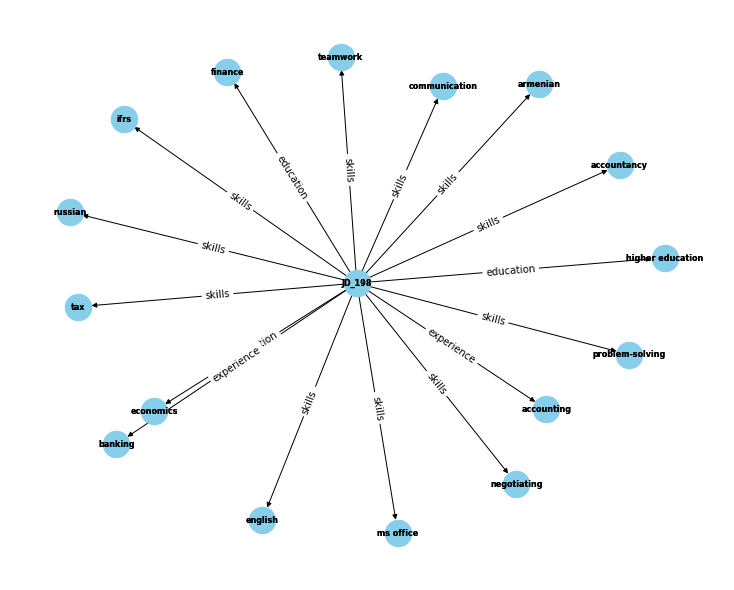

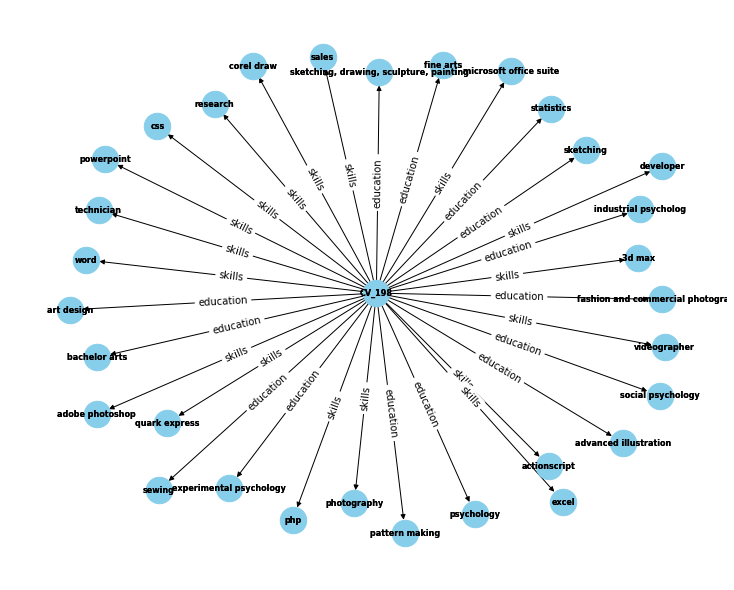

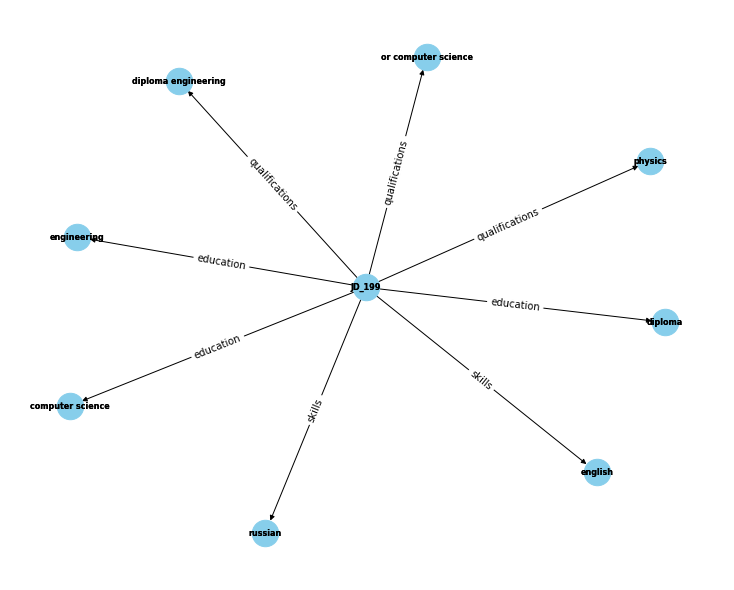

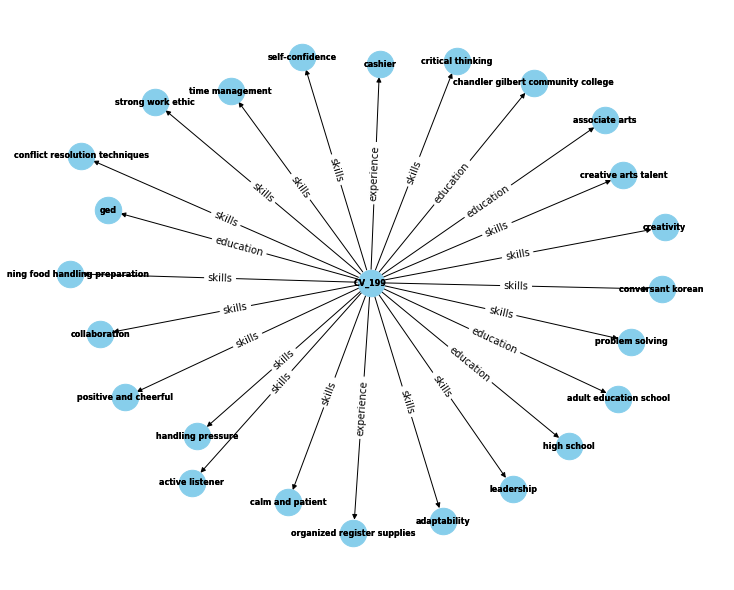

In [52]:
for i in range(196,200):
    jd_text = ENTITY["Outputs_JD"][i]
    JD_i = visualize_job_description(jd_text,"JD_"+str(i))
    JD_Graphs[i] = JD_i
    print(i, "JD: Done")
    
    cv_text = ENTITY["Outputs_CV"][i]
    CV_i = visualize_job_description(cv_text,"CV_"+str(i))
    CV_Graphs[i] = CV_i
    print(i, "CV: Done")
    

In [54]:
# Save the list to a file
with open('JD_Graphs'+str(i)+'.pkl', 'wb') as file:
    pickle.dump(JD_Graphs, file)
with open('CV_Graphs'+str(i)+'.pkl', 'wb') as file:
    pickle.dump(CV_Graphs, file)    